<a href="https://colab.research.google.com/github/shaemclaughlin/shaemclaughlin/blob/main/digigait_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import statsmodels as sm
from scipy import stats
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('/content/all_collated.csv')

In [224]:
def data_analysis (data):
  #print(data.describe())
  #print(data.corr())
  #for column in data.columns[2:-9]:
    #ColumnSeriesObj = df[column]
    #df.boxplot(column, by= 'Genotype', figsize=(12, 8))
  anova = []
  for column in data.columns[0:2]:
    anova.append(data[column])
  for column in data.columns[2:-9]:
    pval = []
    pval = scipy.stats.shapiro(data[column])
    if pval[1]>0.05:
      anova.append(data[column])
  clean_df = pd.DataFrame(anova)
  clean_df = clean_df.T
  for column in clean_df.columns[2:]:
    col = column
    sns.set(style="whitegrid")
    sns.barplot(x="Genotype", y= col, data=clean_df, capsize=.1, ci='sd')
    sns.swarmplot(x="Genotype", y= col, data=clean_df, color="0", alpha=.35)
    plt.show()
  #return clean_df
  vars = []
  fval = []
  pv = []
  for var in clean_df.columns[2:]:
    k = len(pd.unique(clean_df.Genotype))
    N = len(clean_df.values)
    n = clean_df.groupby('Genotype').size()
    DFbetween = k - 1
    DFwithin = N - k
    total_mean = clean_df[var].mean()
    group_means = clean_df.groupby('Genotype').mean()[var]
    group_counts = clean_df.groupby('Genotype').count()[var]
    sample_size_times_diff = ((group_means-total_mean)**2) * group_counts
    SSR = sample_size_times_diff.sum()
    SSE = (clean_df[var].sub(clean_df.groupby('Genotype')[var].transform('mean'))**2).sum()
    F = (SSR/DFbetween)/(SSE/DFwithin)
    p = stats.f.sf(F, DFbetween, DFwithin)
    vars.append(var)
    fval.append(F)
    pv.append(p)
  anova_result_list = {'Variables': vars, 'F-Values': fval, 'P-Values': pv}
  anova_result = pd.DataFrame(anova_result_list)
  return anova_result
    

    

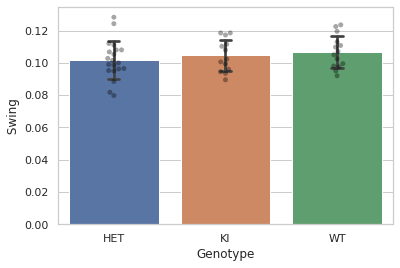

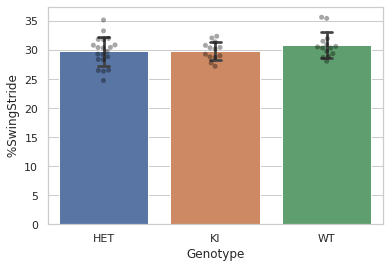

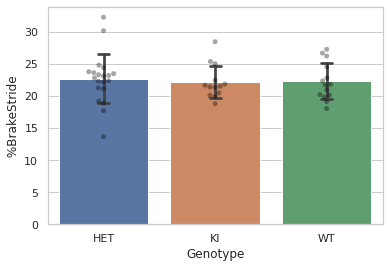

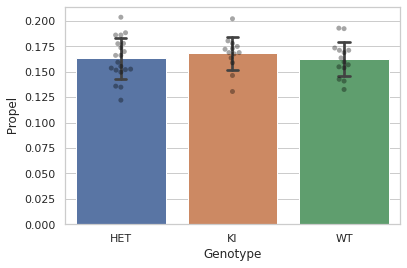

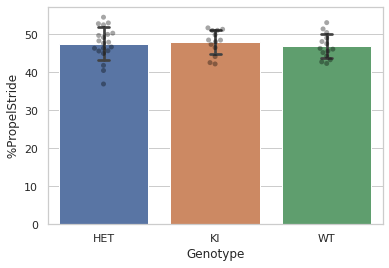

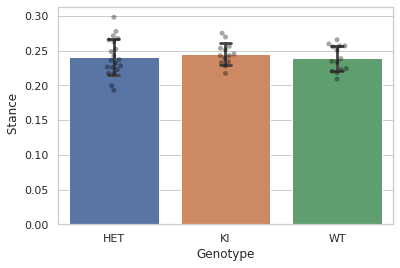

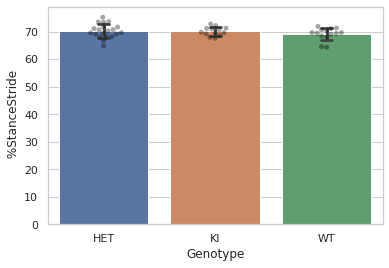

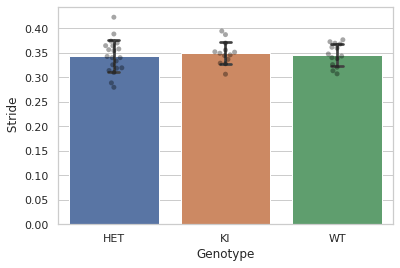

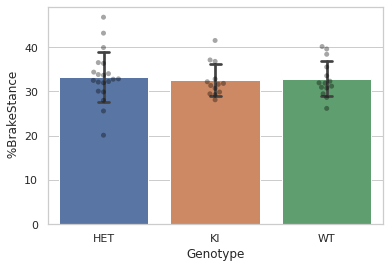

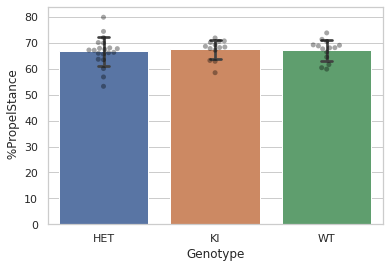

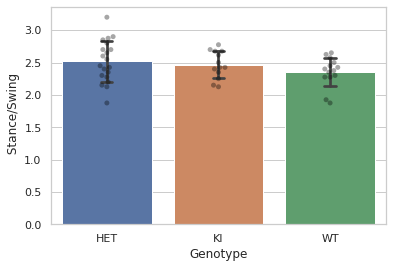

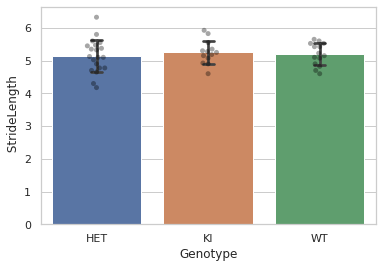

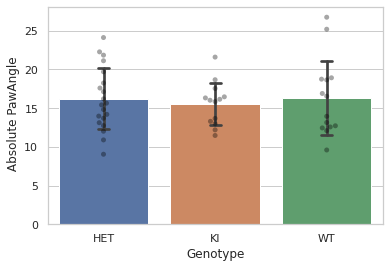

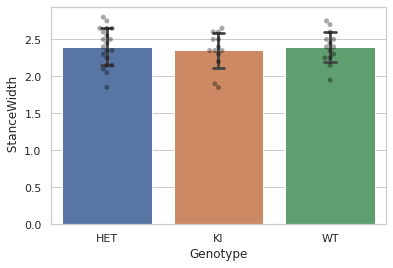

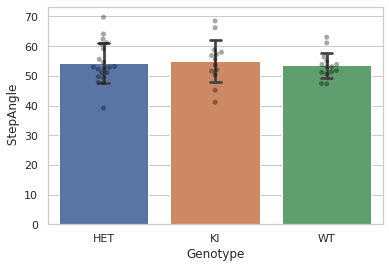

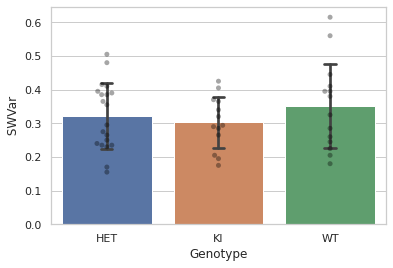

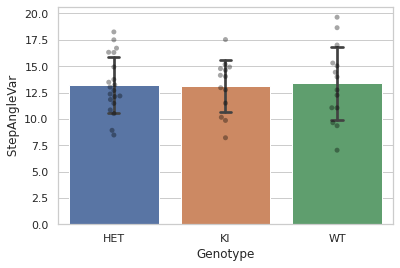

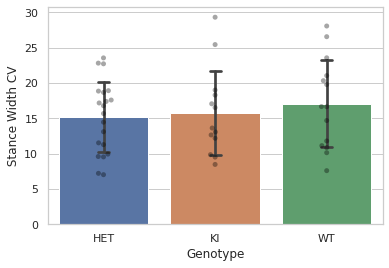

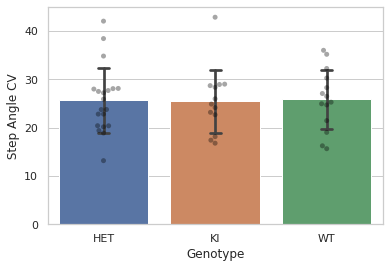

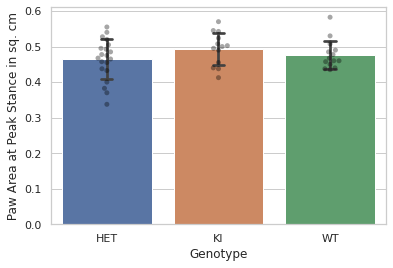

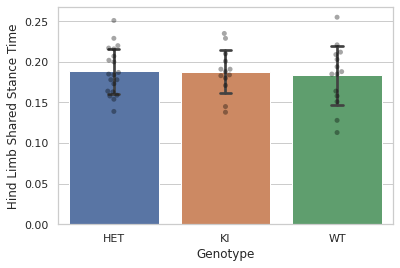

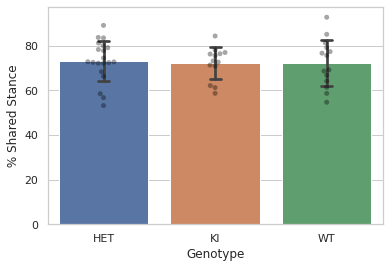

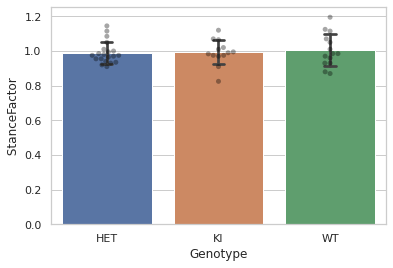

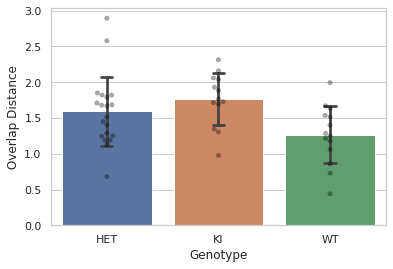

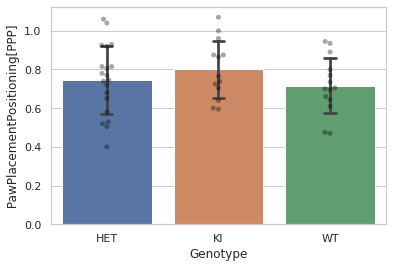

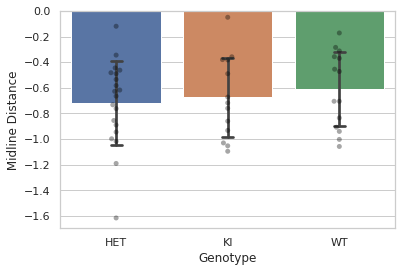

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Variables,F-Values,P-Values
0,Swing,0.839742,0.438624
1,%SwingStride,1.149555,0.326107
2,%BrakeStride,0.109901,0.896168
3,Propel,0.371780,0.691651
4,%PropelStride,0.287468,0.751559
5,Stance,0.270449,0.764296
6,%StanceStride,1.149555,0.326107
7,Stride,0.219582,0.803729
8,%BrakeStance,0.116454,0.890344
9,%PropelStance,0.116454,0.890344


In [225]:
data_analysis(df)